In [2]:
# !pip install deepface

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2

/content/drive/MyDrive/Colab Notebooks/Kode/DFR/PML-TugBes2


In [5]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

from os import listdir
from deepface import DeepFace
from retinaface import RetinaFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [6]:
folder='AnggotaKelas/'
database = []
model = ['VGG-Face', 'OpenFace', 'Facenet', 'FbDeepFace']
i = 2

for filename in listdir(folder):
    path = folder + filename
    number = DeepFace.represent(path, model_name=model[i], align=False,
                                enforce_detection = True)
    number = np.array(number)
    data = [path, number]
    database.append(data)

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:06<00:00, 14.2MB/s]


In [14]:
def mencocokan_wajah_cosine(img_path):
  index = 0
  prediksi = 0
  jarak = 0
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=model[i], 
                                     align=False,
                                     enforce_detection = True))
  for db in database:
    pic1 = database[index][1]
    distance_vector = np.square(pic1 - pic2)
    distance = cosine_similarity(pic1.reshape(1,-1),pic2.reshape(1,-1))
    hasil.append([database[index][0],distance])
    if(distance > jarak ):
        prediksi = index
        jarak = distance
    index += 1
  
  df = pd.DataFrame(hasil, columns = ['Photo', 'Prediksi'])
  df.sort_values(by='Prediksi', ascending=False, inplace=True)
  
  df = menampilkan_hasil(img_path, df)

  return df

In [15]:
def menampilkan_hasil(img_path, df):

  fig = plt.figure(figsize=(20,10))
  fig.add_subplot(3,2,1)
  img2 = plt.imread(img_path)
  plt.title("Asli")
  plt.imshow(img2)
  plt.axis('off')
  z = 2
  for index, row in df.head().iterrows():
      fig.add_subplot(3,2,z)
      img2 = plt.imread(row['Photo'])
      plt.title(f"Kemiripan: {row['Prediksi']}")
      plt.imshow(img2)
      plt.axis('off')
      z = z + 1

  plt.show()
  return df

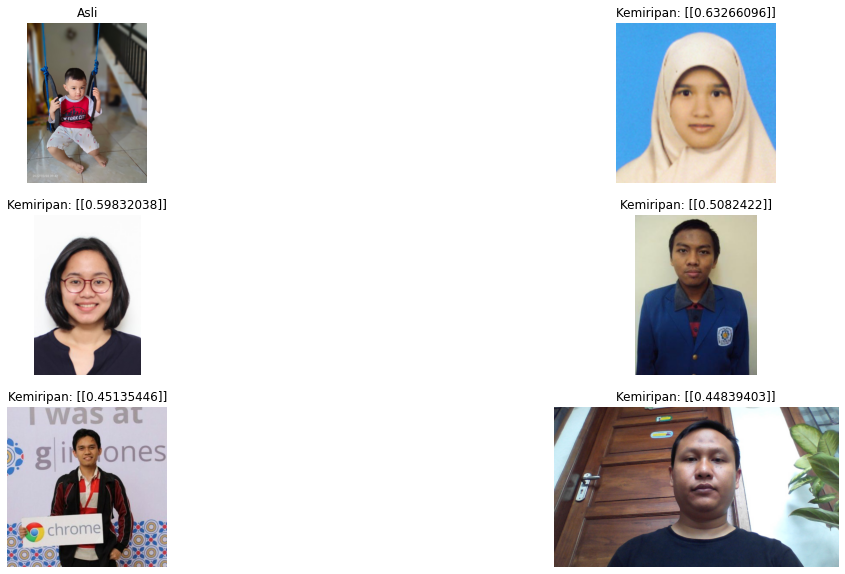

In [16]:
img_path = 'NonAnggotaKelas/Arkhana 001.jpeg'
img = cv2.imread(img_path)
df = mencocokan_wajah_cosine(img_path)

In [18]:
df.head()

,Photo,Prediksi
23,AnggotaKelas/Meza Silvana.jpg,[[0.6326609637702697]]
18,AnggotaKelas/Meredita Susanty.jpg,[[0.5983203828358556]]
7,AnggotaKelas/M Khaerul Naim.jpg,[[0.5082421976184587]]
12,AnggotaKelas/Ahmad Luky Ramdani.jpg,[[0.45135446182860206]]
6,AnggotaKelas/Adiyasa Nurfalah.jpg,[[0.44839402681554524]]


In [19]:
def mencocokan_wajah(img_path):
  index = 0
  prediksi = 0
  jarak = 10
  hasil = []
  pic2 = np.array(DeepFace.represent(img_path, model_name=model[i], align=False,
                                     enforce_detection = True))
  for db in database:
    pic1 = database[index][1]
    distance_vector = np.square(pic1 - pic2)
    distance = np.sqrt(distance_vector.sum())
    hasil.append([database[index][0],distance])
    if(distance < jarak ):
        prediksi = index
        jarak = distance
    index += 1
  
  df = pd.DataFrame(hasil, columns = ['Photo', 'Prediksi'])
  df.sort_values(by='Prediksi', ascending=True, inplace=True)
  
  df = menampilkan_hasil(img_path, df)
  return df

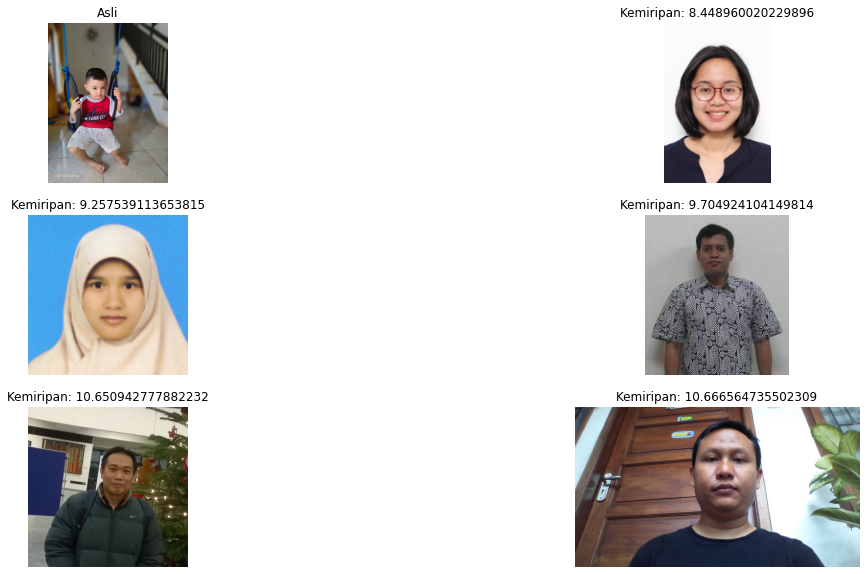

In [20]:
img_path = 'NonAnggotaKelas/Arkhana 001.jpeg'
img = cv2.imread(img_path)
df = mencocokan_wajah(img_path)

In [21]:
df.head()

,Photo,Prediksi
18,AnggotaKelas/Meredita Susanty.jpg,8.448960
23,AnggotaKelas/Meza Silvana.jpg,9.257539
10,AnggotaKelas/Imam Ekowicaksono.jpg,9.704924
0,AnggotaKelas/Varulianto Dear.jpg,10.650943
6,AnggotaKelas/Adiyasa Nurfalah.jpg,10.666565
